Dataset link : https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci

#### Importing module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('online_retail.csv')
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom

Attribute Information:

InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.

UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).

CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal. The name of the country where a customer resides.

#### Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

- Datatype of InvoiceDate is object need to convert it into datatime.
- There are null values in CustomerID and Description.

#### Customer ID is our Identification feature and Description has Product description. We cannot do RFM analysis and KMeans Clustering without Customer ID values. Hence, droppingg the missing values

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [6]:
df.describe()

Quantity          Price    Customer ID
count  824364.000000  824364.000000  824364.000000
mean       12.414574       3.676800   15324.638504
std       188.976099      70.241388    1697.464450
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13975.000000
50%         5.000000       1.950000   15255.000000
75%        12.000000       3.750000   16797.000000
max     80995.000000   38970.000000   18287.000000

We observe Quantity and Price columns have negative values lets explore these entries

In [7]:
df[df['Quantity']<0]

Invoice StockCode                       Description  Quantity  \
178      C489449     22087          PAPER BUNTING WHITE LACE       -12   
179      C489449    85206A      CREAM FELT EASTER EGG BASKET        -6   
180      C489449     21895     POTTING SHED SOW 'N' GROW SET        -4   
181      C489449     21896                POTTING SHED TWINE        -6   
182      C489449     22083        PAPER CHAIN KIT RETRO SPOT       -12   
...          ...       ...                               ...       ...   
1065910  C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
1067002  C581499         M                            Manual        -1   
1067176  C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
1067177  C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
1067178  C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

                 InvoiceDate   Price  Customer ID         Country  
178      2009-12-01 10:33:00    2.95      16321.0       Australia  
179      2009-12-01 10:33:00    1.65      16321.0       Australia  
180      2009-12-01 10:33:00    4.25      16321.0       Australia  
181      2009-12-01 10:33:00    2.10      16321.0       Australia  
182      2009-12-01 10:33:00    2.95      16321.0       Australia  
...                      ...     ...          ...             ...  
1065910  2011-12-09 09:57:00    0.83      14397.0  United Kingdom  
1067002  2011-12-09 10:28:00  224.69      15498.0  United Kingdom  
1067176  2011-12-09 11:57:00   10.95      15311.0  United Kingdom  
1067177  2011-12-09 11:58:00    1.25      17315.0  United Kingdom  
1067178  2011-12-09 11:58:00    1.25      17315.0  United Kingdom  

[18744 rows x 8 columns]

Invoice numbers start with C and as per description of data these are cancellations hence dropping these entries

In [8]:
# changing the datatype to str
df['Invoice'] = df['Invoice'].astype('str')

In [9]:
df = df[~df['Invoice'].str.contains('C')]

In [10]:
df[df['Price']<=0].sort_values('Price')

Invoice StockCode                          Description  Quantity  \
4674     489825     22076                   6 RIBBONS EMPIRE          12   
840208   564651     22955             36 FOIL STAR CAKE CASES        144   
840207   564651     23268  SET OF 2 CERAMIC CHRISTMAS REINDEER       192   
840206   564651     23270     SET OF 2 CERAMIC PAINTED HEARTS         96   
823515   562973     23157           SET OF 6 NATIVITY MAGNETS        240   
...         ...       ...                                  ...       ...   
327801   521375     22202              MILK PAN PINK RETROSPOT         3   
296375   518231     22472            TV DINNER TRAY DOLLY GIRL         9   
276858   516304     22690        DOORMAT HOME SWEET HOME BLUE          6   
400047   527696     22121           NOEL WOODEN BLOCK LETTERS          1   
1027583  578841     84826       ASSTD DESIGN 3D PAPER STICKERS     12540   

                 InvoiceDate  Price  Customer ID         Country  
4674     2009-12-02 13:34:00    0.0      16126.0  United Kingdom  
840208   2011-08-26 14:19:00    0.0      14646.0     Netherlands  
840207   2011-08-26 14:19:00    0.0      14646.0     Netherlands  
840206   2011-08-26 14:19:00    0.0      14646.0     Netherlands  
823515   2011-08-11 11:42:00    0.0      14911.0            EIRE  
...                      ...    ...          ...             ...  
327801   2010-09-05 11:58:00    0.0      12647.0         Germany  
296375   2010-08-05 15:28:00    0.0      12471.0         Germany  
276858   2010-07-19 13:13:00    0.0      14025.0  United Kingdom  
400047   2010-10-18 15:13:00    0.0      13554.0  United Kingdom  
1027583  2011-11-25 15:57:00    0.0      13256.0  United Kingdom  

[71 rows x 8 columns]

We observe that these are not product purchase transactions but transactions of store related to some debt hence also deopping these entries

In [11]:
# taking price values greater than 0.
df = df[df['Price']>0]
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [12]:
df.shape

(805549, 8)

In [13]:
df.describe()

Quantity          Price    Customer ID
count  805549.000000  805549.000000  805549.000000
mean       13.290522       3.206561   15331.954970
std       143.634088      29.199173    1696.737039
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13982.000000
50%         5.000000       1.950000   15271.000000
75%        12.000000       3.750000   16805.000000
max     80995.000000   10953.500000   18287.000000

In [14]:
# Converting InvoiceDate to datetime. InvoiceDate is in format of YYYY-mm-dd HH:MM:SS.
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

#### Making total amount column by multiplying quantity with price

In [15]:
df['TotalAmount'] = df['Quantity']*df['Price']
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  TotalAmount  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom         83.4  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom         81.0  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom         81.0  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom        100.8  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom         30.0

#### TOP 10 HIGHEST SELLING PRODUCTS SOLD BY THE STORE

                         Product_name  Quantity
0   WORLD WAR 2 GLIDERS ASSTD DESIGNS    109169
1  WHITE HANGING HEART T-LIGHT HOLDER     93640
2         PAPER CRAFT , LITTLE BIRDIE     80995
3       ASSORTED COLOUR BIRD ORNAMENT     79913
4      MEDIUM CERAMIC TOP STORAGE JAR     77916
5             JUMBO BAG RED RETROSPOT     75759
6                 BROCADE RING PURSE      71129
7  PACK OF 60 PINK PAISLEY CAKE CASES     55270
8         60 TEATIME FAIRY CAKE CASES     53495
9     PACK OF 72 RETROSPOT CAKE CASES     46107


Text(0.5, 1.0, 'Top 10 products by quantity')

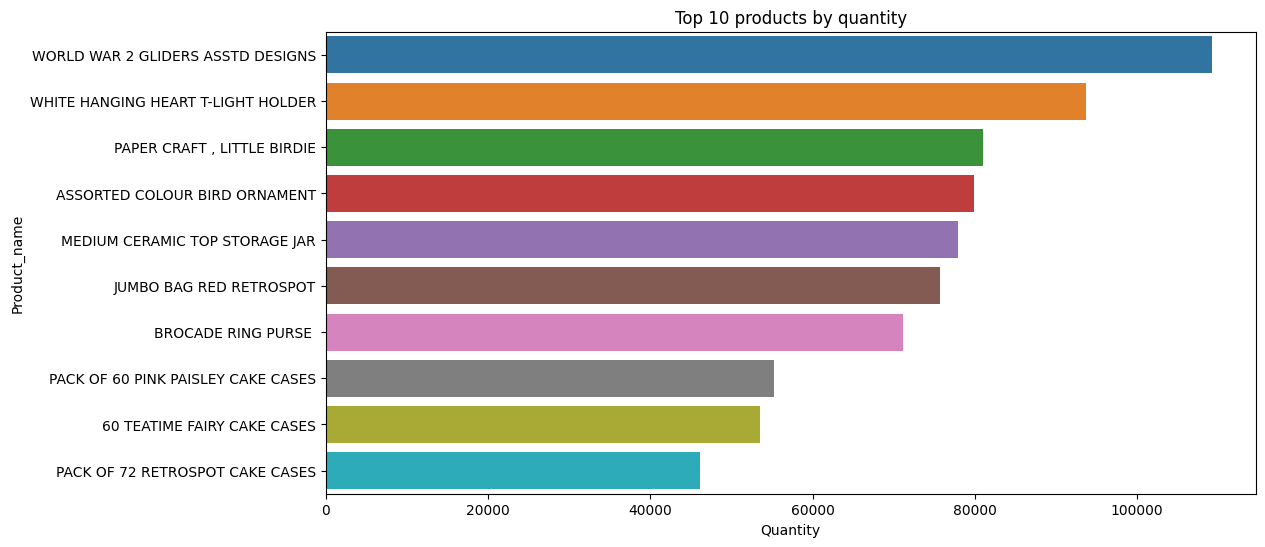

In [16]:
df1=df.groupby('Description').sum()
df1.sort_values(['Quantity'], ascending=False,inplace=True)
df1.reset_index(inplace=True)
df1.rename(columns={'Description':'Product_name'},inplace=True)
df2 = df1[['Product_name','Quantity']][:10]
print(df2)
plt.figure(figsize=(12,6))
sns.barplot(x=df1['Quantity'],y=df2['Product_name'])
plt.title('Top 10 products by quantity')

- WORLD WAR 2 GLIDERS ASSTD DESIGNS was the highest selling product
- WHITE HANGING HEART T-LIGHT HOLDER was the second highest selling product

#### TOP 10 HIGHEST SELLING PRODUCTS SOLD BY THE STORE¶

In [17]:
df1[['Product_name','Quantity']].tail(10)

Product_name  Quantity
5273   WHITE SCANDINAVIAN HEART CHRISTMAS         1
5274    ENGLISH ROSE TEA FOR ONE GIFT BOX         1
5275                   OWLS CHARLOTTE BAG         1
5276    F FAIRY POTPOURRI CUSHIONS SUMMER         1
5277     F.FAIRY S/3 SML CANDLE, LAVENDER         1
5278         F.FAIRY S/3 SML CANDLE, ROSE         1
5279   F.FAIRY S/3 SML CANDLE,LILY/VALLEY         1
5280      VINTAGE METAL CAKE STAND CREAM          1
5281  F.FAIRY,CANDLE IN GLASS,LILY/VALLEY         1
5282        RUSSIAN FOLKART STACKING TINS         1

These are the least selling products of the store with only 1 unit sold of each product

#### TOP 10 HIGHEST SPENDING CUSTOMERS

In [18]:
df1 = df.groupby('Customer ID')['TotalAmount'].sum()
df1 = df1.reset_index()
Top10Spending = df1.sort_values('TotalAmount',ascending=False)
Top10Spending.head(10)

Customer ID  TotalAmount
5692      18102.0    608821.65
2277      14646.0    528602.52
1789      14156.0    313946.37
2538      14911.0    295972.63
5050      17450.0    246973.09
1331      13694.0    196482.81
5109      17511.0    175603.55
4061      16446.0    168472.50
4295      16684.0    147142.77
68        12415.0    144458.37

Text(0.5, 1.0, 'Top 10 Spending Customers.')

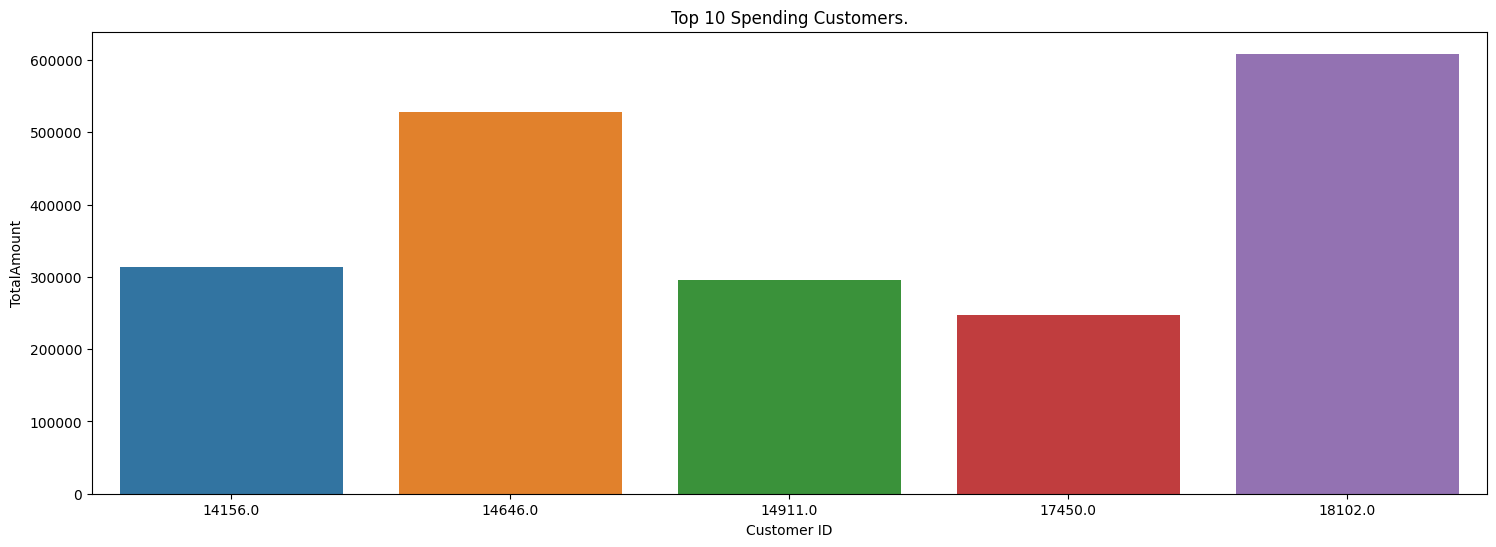

In [19]:
# Top 10 Spending Customers
plt.figure(figsize=(18,6))
sns.barplot(x=Top10Spending['Customer ID'].head(),y=Top10Spending['TotalAmount'].head(10))
plt.title('Top 10 Spending Customers.')

In [20]:
df1=df['Customer ID'].value_counts()
df1=df1.reset_index()
Top10Frequent=df1.rename(columns={'index':'Customer ID','Customer ID':'Frequency'})
Top10Frequent.head(10)

Customer ID  Frequency
0      17841.0      12890
1      14911.0      11245
2      12748.0       7228
3      14606.0       6566
4      14096.0       5111
5      15311.0       4434
6      14156.0       4048
7      14646.0       3849
8      13089.0       3362
9      16549.0       3250

#### TOP 10 COUNTRIES CONTRIBUTING HIGHEST REVENUE TO THE STORE

In [21]:
TopCountries=df.groupby('Country')['TotalAmount'].sum().reset_index().sort_values('TotalAmount',ascending=False)
TopCountries.head(10)

Country   TotalAmount
38  United Kingdom  1.472315e+07
10            EIRE  6.216311e+05
24     Netherlands  5.542323e+05
14         Germany  4.312625e+05
13          France  3.552575e+05
0        Australia  1.699681e+05
32           Spain  1.091785e+05
34     Switzerland  1.003653e+05
33          Sweden  9.154972e+04
9          Denmark  6.986219e+04

Text(0.5, 1.0, 'Top 5 Countries based on highest store revenue contributions')

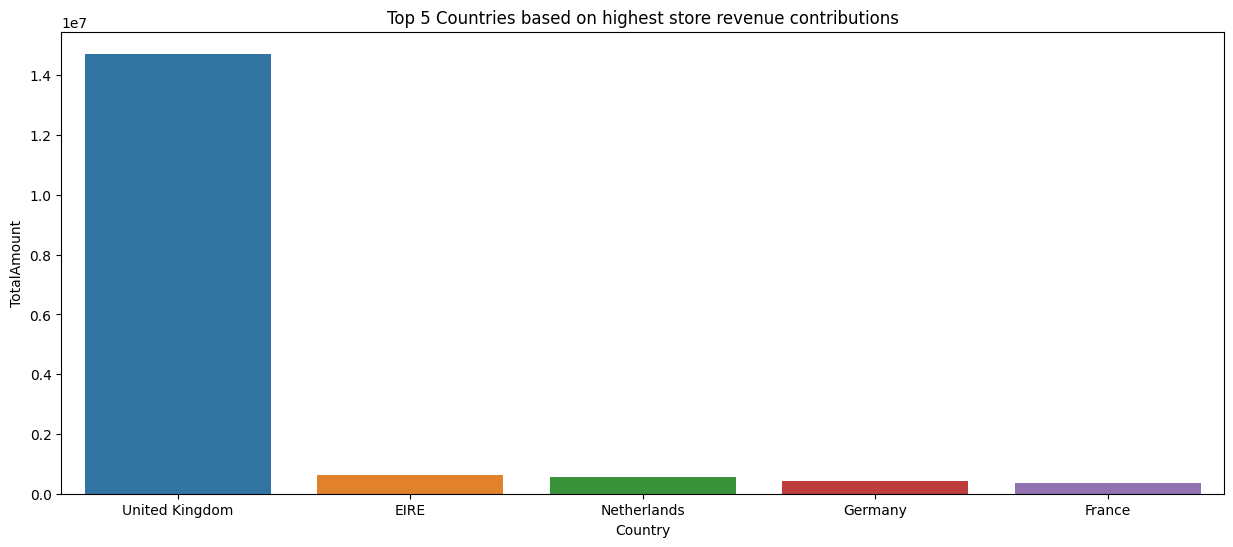

In [22]:
# top 5 countries where maximum sale happens.
plt.figure(figsize=(15,6))
sns.barplot(x=TopCountries['Country'].head(5),y=TopCountries['TotalAmount'].head(5))
plt.title('Top 5 Countries based on highest store revenue contributions')

#### UK contributes most revenue to the store. European countries like Germany, France, Netherlands, EIRE contribute significant revenue to the store

**Recency = Latest Date - Last Invoice Date**

**Frequency = count of invoice no. of transaction(s)**

**Monetary = Sum of Total Amount for each customer**

In [23]:
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09.
Latest_Date = dt.datetime(2011,12,10)

#Creating RFM Modelling scores for each customer
df1 = df.groupby('Customer ID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 
                'Invoice': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

df1['InvoiceDate'] = df1['InvoiceDate'].astype(int)

#Renaming column names to Recency, Frequency and Monetary
df1.rename(columns={'InvoiceDate': 'Recency', 
                         'Invoice': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

df1.reset_index().head()

Customer ID  Recency  Frequency  Monetary
0      12346.0      325         34  77556.46
1      12347.0        2        253   5633.32
2      12348.0       75         51   2019.40
3      12349.0       18        175   4428.69
4      12350.0      310         17    334.40

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5878 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    5878 non-null   int32  
 1   Frequency  5878 non-null   int64  
 2   Monetary   5878 non-null   float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 160.7 KB


In [25]:
df1 = df1.astype('float32')
col=df1.select_dtypes(['float32']).columns
col

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

Recency
0.8869671873331385


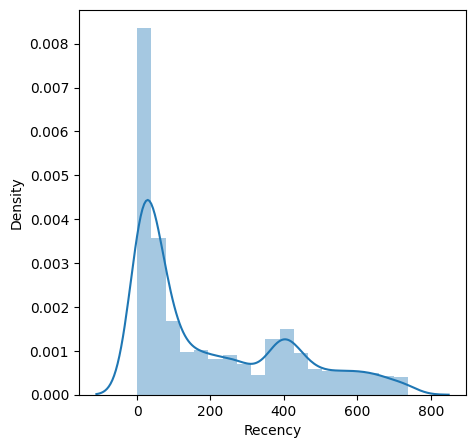

Frequency
18.051480199135423


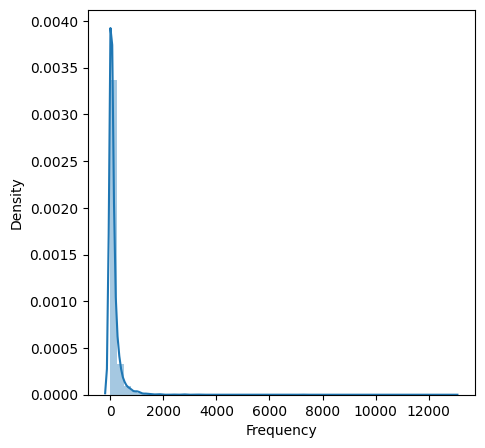

Monetary
25.307776917056668


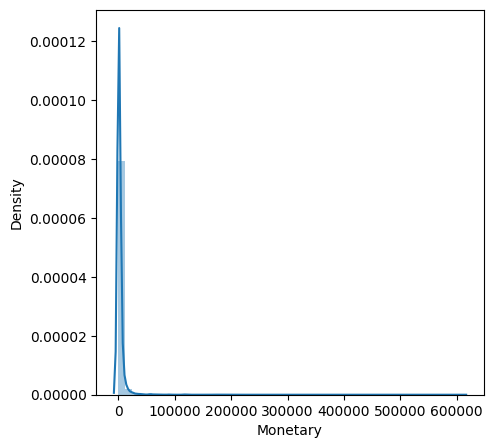

In [26]:
from scipy.stats import skew
for i in df1[col]: #looping of all col. values
    print(i)
    print(skew(df1[i]))
    
    plt.figure(figsize=(5,5))
    sns.distplot(df1[i])
    plt.show()

In [27]:
df1['Monetary'] = np.log(df1['Monetary'])
df1['Frequency'] = np.log(df1['Frequency'])
df1['Recency'] = np.log(df1['Recency'])

In [28]:
df1.head()

Recency  Frequency   Monetary
Customer ID                                
12346.0      5.783825   3.526361  11.258761
12347.0      0.693147   5.533390   8.636455
12348.0      4.317488   3.931826   7.610556
12349.0      2.890372   5.164786   8.395859
12350.0      5.736572   2.833213   5.812338

### Kmeans Clustering

#### 1. Applying Elbow Method on Recency and Monetary.

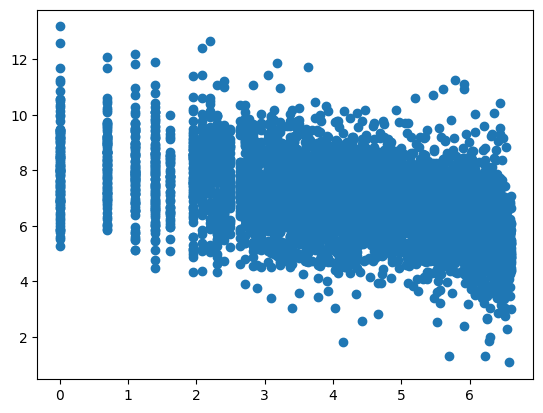

In [29]:
plt.scatter(df1['Recency'],df1['Monetary'])
plt.show()

In [30]:
df1.head()

Recency  Frequency   Monetary
Customer ID                                
12346.0      5.783825   3.526361  11.258761
12347.0      0.693147   5.533390   8.636455
12348.0      4.317488   3.931826   7.610556
12349.0      2.890372   5.164786   8.395859
12350.0      5.736572   2.833213   5.812338

In [31]:
inf=df1[df1['Recency']==float('-inf')]
df1.drop(inf.index,inplace=True)

In [32]:
from sklearn.preprocessing import StandardScaler
# taking Recency and Monetary in list.
Recency_and_Monetary=['Recency','Monetary']

# taking only values of recency and monetary in X.
X=df1[Recency_and_Monetary].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

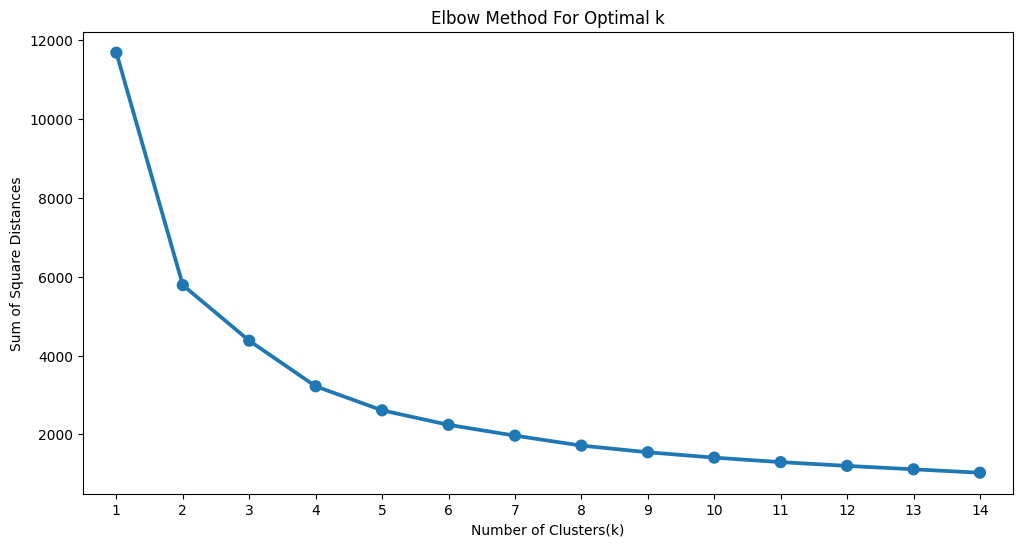

In [33]:
#applying Elbow Method
from sklearn.cluster import KMeans
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [34]:
#Silhouette Score
from sklearn.metrics import silhouette_score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4391578137874603
For n_clusters = 3, silhouette score is 0.34332799911499023
For n_clusters = 4, silhouette score is 0.3814105689525604
For n_clusters = 5, silhouette score is 0.3698876202106476
For n_clusters = 6, silhouette score is 0.37119704484939575
For n_clusters = 7, silhouette score is 0.34322208166122437
For n_clusters = 8, silhouette score is 0.3441469073295593
For n_clusters = 9, silhouette score is 0.34678927063941956
For n_clusters = 10, silhouette score is 0.34620845317840576
For n_clusters = 11, silhouette score is 0.3533150553703308
For n_clusters = 12, silhouette score is 0.35356956720352173
For n_clusters = 13, silhouette score is 0.3511098325252533
For n_clusters = 14, silhouette score is 0.3472471833229065
For n_clusters = 15, silhouette score is 0.34781816601753235


In [35]:
km = KMeans(n_clusters = 2)
ypred = km.fit_predict(df1[['Recency','Monetary']])
ypred

array([0, 0, 0, ..., 1, 1, 0])

In [36]:
df1['rec_mon_based_cluster'] = ypred
df1.head()

Recency  Frequency   Monetary  rec_mon_based_cluster
Customer ID                                                       
12346.0      5.783825   3.526361  11.258761                      0
12347.0      0.693147   5.533390   8.636455                      0
12348.0      4.317488   3.931826   7.610556                      0
12349.0      2.890372   5.164786   8.395859                      0
12350.0      5.736572   2.833213   5.812338                      1

In [37]:
df2 = df1[df1['rec_mon_based_cluster']==0]
df3 = df1[df1['rec_mon_based_cluster']==1]

In [38]:
km.cluster_centers_

array([[2.9240825, 7.7438035],
       [5.57936  , 6.0940094]], dtype=float32)

In [39]:
km.inertia_

12793.2509765625

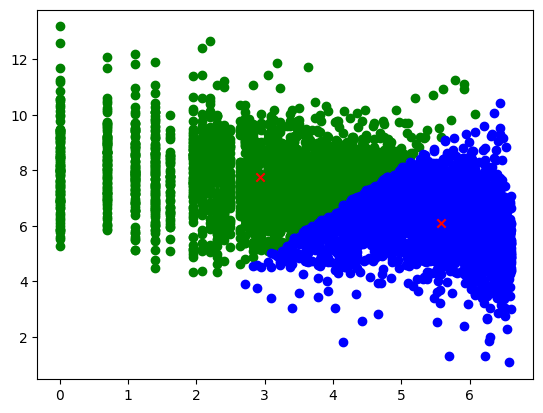

In [40]:
plt.scatter(df2['Recency'],df2['Monetary'],color='green')
plt.scatter(df3['Recency'],df3['Monetary'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='x')

#### 2. Applying Elbow Method on Frequency and Monetary

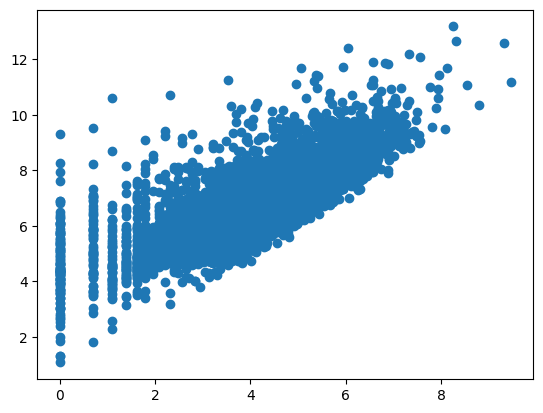

In [41]:
plt.scatter(df1['Frequency'],df1['Monetary'])
plt.show()

In [42]:
df1.head()

Recency  Frequency   Monetary  rec_mon_based_cluster
Customer ID                                                       
12346.0      5.783825   3.526361  11.258761                      0
12347.0      0.693147   5.533390   8.636455                      0
12348.0      4.317488   3.931826   7.610556                      0
12349.0      2.890372   5.164786   8.395859                      0
12350.0      5.736572   2.833213   5.812338                      1

In [43]:
from sklearn.preprocessing import StandardScaler
# taking Recency and Monetary in list.
Frequency_and_Monetary=['Frequency','Monetary']

# taking only values of recency and monetary in X.
X=df1[Frequency_and_Monetary].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

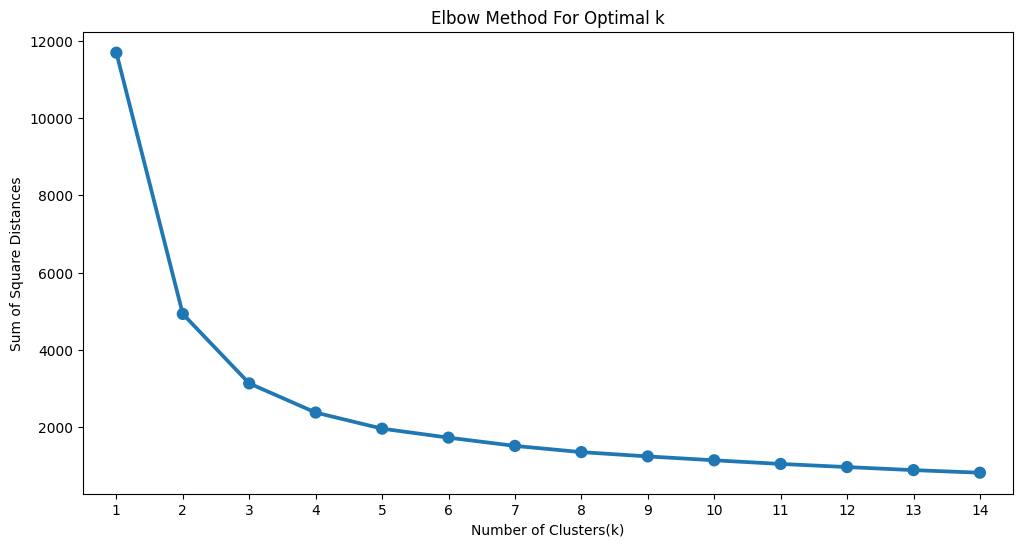

In [44]:
#applying Elbow Method
from sklearn.cluster import KMeans
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [45]:
#Silhouette Score
from sklearn.metrics import silhouette_score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.48514553904533386
For n_clusters = 3, silhouette score is 0.4253368377685547
For n_clusters = 4, silhouette score is 0.39041829109191895
For n_clusters = 5, silhouette score is 0.3664928376674652
For n_clusters = 6, silhouette score is 0.33707931637763977
For n_clusters = 7, silhouette score is 0.3511948883533478
For n_clusters = 8, silhouette score is 0.33601394295692444
For n_clusters = 9, silhouette score is 0.3463432192802429
For n_clusters = 10, silhouette score is 0.35435980558395386
For n_clusters = 11, silhouette score is 0.3607776165008545
For n_clusters = 12, silhouette score is 0.35721418261528015
For n_clusters = 13, silhouette score is 0.36377277970314026
For n_clusters = 14, silhouette score is 0.3529714345932007
For n_clusters = 15, silhouette score is 0.3565991520881653


In [46]:
km = KMeans(n_clusters = 2)
ypred = km.fit_predict(df1[['Frequency','Monetary']])
ypred

array([0, 0, 0, ..., 1, 0, 0])

In [47]:
df1['freq_mon_based_cluster'] = ypred
df1.head()

Recency  Frequency   Monetary  rec_mon_based_cluster  \
Customer ID                                                          
12346.0      5.783825   3.526361  11.258761                      0   
12347.0      0.693147   5.533390   8.636455                      0   
12348.0      4.317488   3.931826   7.610556                      0   
12349.0      2.890372   5.164786   8.395859                      0   
12350.0      5.736572   2.833213   5.812338                      1   

             freq_mon_based_cluster  
Customer ID                          
12346.0                           0  
12347.0                           0  
12348.0                           0  
12349.0                           0  
12350.0                           1

In [48]:
df2 = df1[df1['freq_mon_based_cluster']==0]
df3 = df1[df1['freq_mon_based_cluster']==1]

In [49]:
km.cluster_centers_

array([[5.042096 , 7.873849 ],
       [2.8510363, 5.7819934]], dtype=float32)

In [50]:
km.inertia_

9783.669921875

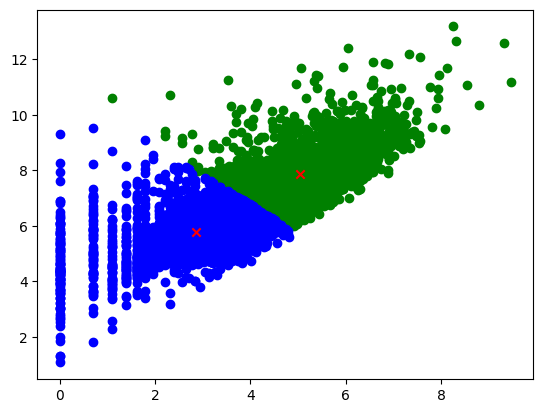

In [51]:
plt.scatter(df2['Frequency'],df2['Monetary'],color='green')
plt.scatter(df3['Frequency'],df3['Monetary'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='x')

#### 3. Applying Elbow Method on Recency and Frequency.

In [52]:
from sklearn.preprocessing import StandardScaler
# taking Recency and Frequency in list.
Recency_Frequency=['Recency','Frequency']

# taking only values of recency and monetary in X.
X=df1[Recency_Frequency].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

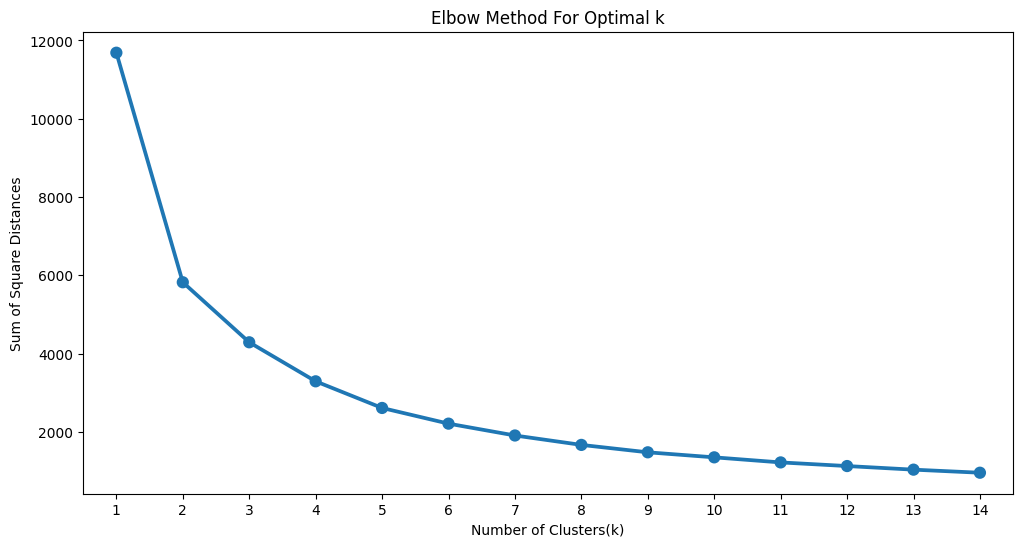

In [53]:
#applying Elbow Method
from sklearn.cluster import KMeans
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [54]:
#Silhouette Score
from sklearn.metrics import silhouette_score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4374729096889496
For n_clusters = 3, silhouette score is 0.3469771444797516
For n_clusters = 4, silhouette score is 0.36511340737342834
For n_clusters = 5, silhouette score is 0.3678611218929291
For n_clusters = 6, silhouette score is 0.3535703122615814
For n_clusters = 7, silhouette score is 0.36096301674842834
For n_clusters = 8, silhouette score is 0.3631921112537384
For n_clusters = 9, silhouette score is 0.35055801272392273
For n_clusters = 10, silhouette score is 0.3440943658351898
For n_clusters = 11, silhouette score is 0.3455418050289154
For n_clusters = 12, silhouette score is 0.34900471568107605
For n_clusters = 13, silhouette score is 0.3531055152416229
For n_clusters = 14, silhouette score is 0.3450388014316559
For n_clusters = 15, silhouette score is 0.3439605236053467


#### applying Kmeans clustering algorithm

In [55]:
km = KMeans(n_clusters = 2)
ypred = km.fit_predict(df1[['Recency','Frequency']])
ypred

array([1, 0, 1, ..., 1, 1, 0])

In [56]:
df1['rec_freq_based_cluster'] = ypred
df1.head()

Recency  Frequency   Monetary  rec_mon_based_cluster  \
Customer ID                                                          
12346.0      5.783825   3.526361  11.258761                      0   
12347.0      0.693147   5.533390   8.636455                      0   
12348.0      4.317488   3.931826   7.610556                      0   
12349.0      2.890372   5.164786   8.395859                      0   
12350.0      5.736572   2.833213   5.812338                      1   

             freq_mon_based_cluster  rec_freq_based_cluster  
Customer ID                                                  
12346.0                           0                       1  
12347.0                           0                       0  
12348.0                           0                       1  
12349.0                           0                       0  
12350.0                           1                       1

In [57]:
df2 = df1[df1['rec_freq_based_cluster']==0]
df3 = df1[df1['rec_freq_based_cluster']==1]

#### Centers of the clusters

In [58]:
km.cluster_centers_

array([[2.902803 , 4.9338465],
       [5.5467854, 3.1884122]], dtype=float32)

In [59]:
km.inertia_

13460.623046875

#### plotting visualizing the clusters

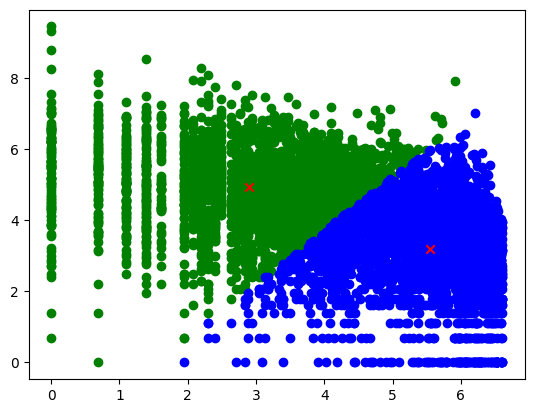

In [60]:
plt.scatter(df2['Recency'],df2['Frequency'],color='green')
plt.scatter(df3['Recency'],df3['Frequency'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='x')

#### We can see that mean of all the features Recency, Frequency and Monetary is significantly different for the two clusters